**<h1>Introduction</h1>**
Problem Statement: Classifying Amazon reviews based on customer ratings using NLP

**<h4 align="center">Impact</h4>**

Reviews provide objective feedback to a product and are therefore inherently useful for consumers. These ratings are often summarized by a numerical rating, or the number of stars. Of course there is more value in the actual text itself than the quantified stars. And at times, the given rating does not truly convey the experience of the product – the heart of the feedback is actually in the text itself. The goal therefore is to build a classifier that would understand the essence of a piece of review and assign it the most appropriate rating based on the meaning of the text.

**<h4 align="center">Background</h4>**

Though product ratings on Amazon are aggregated from all the reviews by every customer, each individual rating is actually only an integer that ranges from one star to five stars. This reduces our predictions to discrete classes totaling five possibilities. Therefore what we'll have is a supervised, multi-class classifier with the actual review text as the core predictor.

This study is an exploration of Natural Language Processing (NLP). The goal of predicting the star rating given a piece of text will take on different NLP topics including word embedding, topic modeling, and dimension reduction. From there, we'll arrive at a final dataframe and we'll be employing different machine learning techniques in order to come up with the best approach (i.e. most accurate estimator) for our classifier.

<h4 align="center" id="Datasets">Datasets</h4>

The [Amazon dataset](http://jmcauley.ucsd.edu/data/amazon/index.html) contains the customer reviews for all listed *Electronics* products spanning from May 1996 up to July 2014. There are a total of 1,689,188 reviews by a total of 192,403 customers on 63,001 unique products. The data dictionary is as follows:

*  **asin** - Unique ID of the product being reviewed, *string*
*  **helpful** - A list with two elements: the number of users that voted *helpful*, and the total number of users that voted on the review (including the *not helpful* votes), *list*
*  **overall** - The reviewer's rating of the product, *int64*
*  **reviewText** - The review text itself, *string*
*  **reviewerID** - Unique ID of the reviewer, *string*
*  **reviewerName** - Specified name of the reviewer, *string*
*  **summary** - Headline summary of the review, *string*
*  **unixReviewTime** - Unix Time of when the review was posted, *string*

# Data Wrangling #

In [ ]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [ ]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

df.head(10)

In [ ]:
df.shape

In [ ]:
df.to_csv("amazon.csv")

In [ ]:
from google.colab import files
files.download("amazon.csv")

In [ ]:
shuffle=df.sample(frac=1)

In [ ]:
shuffle.head(10)

In [ ]:
import numpy as np
result=np.array_split(shuffle,3)

In [ ]:
df1=result[0].reset_index().drop("index",axis=1)
df2=result[1].reset_index().drop("index",axis=1)
df3=result[2].reset_index().drop("index",axis=1)

In [ ]:
df1.shape

In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
df1.to_csv("amazon_1.csv")
df2.to_csv("amazon_2.csv")
df3.to_csv("amazon_3.csv")

In [ ]:
df=pd.read_csv("amazon_1.csv").drop("Unnamed: 0",axis=1)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.drop(["reviewerID","asin","reviewerName","helpful","summary","unixReviewTime","reviewTime"],axis=1,inplace=True)

In [ ]:
df.overall.unique()

In [ ]:
df.overall.value_counts().plot.bar()

In [ ]:
df["reviewText"]=df["reviewText"].str.lower()
df["reviewText"]=df["reviewText"].str.replace("[^\w\s]","")
df["reviewText"]=df["reviewText"].str.replace("\d+","")
df["reviewText"]=df["reviewText"].str.replace("\n"," ").replace("\r","")

In [ ]:
def sentiment(sent):
    if sent>3:
        return 2
    elif sent<3:
        return 1
    else:
        return 0

In [ ]:
df["sentimentOverall"]=df["overall"].apply(sentiment)

In [ ]:
#reviewText alanında boşluklar olduğu için o alanlar kaldırıldı
df=df[df.reviewText.notna()]

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(str(i)) for i in df['reviewText'].values]

In [ ]:
import nltk
nltk.download("wordnet")


In [ ]:
from textblob import TextBlob
df[["polarity","subjectivity"]]=df["reviewText"].apply(lambda t:pd.Series(TextBlob(t).sentiment))


In [ ]:
df.loc[df['subjectivity']>0.5,'sentimentPolarity']=2
df.loc[df['subjectivity']==0.5,'sentimentPolarity']=0
df.loc[df['subjectivity']<0.5,'sentimentPolarity']=1
df.head()

In [ ]:
df.to_csv("result_df.csv")

Ram sisti ve bundan sonra result_df file ile calisilacak

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("result_df.csv")

In [3]:
df=df.drop("Unnamed: 0",axis=1)

In [4]:
df.sample(5)

,reviewText,overall,sentimentOverall,tokenized,polarity,subjectivity,sentimentPolarity
375287,ive had this about month and everything seems...,5,2,"['ive', 'had', 'this', 'about', 'month', 'and'...",0.433333,0.833333,2.0
140052,great earphones which i use constantly sound q...,5,2,"['great', 'earphones', 'which', 'i', 'use', 'c...",0.412500,0.596071,2.0
508360,i bought ordered this to replace my old sony i...,4,2,"['i', 'bought', 'ordered', 'this', 'to', 'repl...",0.203939,0.414242,1.0
463298,fits very well and protects the whole tablet p...,5,2,"['fits', 'very', 'well', 'and', 'protects', 't...",0.206869,0.455051,1.0
232498,a great case good fit and construction provi...,5,2,"['a', 'great', 'case', 'good', 'fit', 'and', '...",0.725000,0.687500,2.0


<AxesSubplot:>

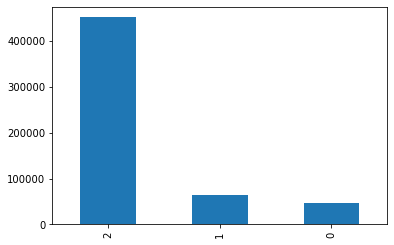

In [5]:
df["sentimentOverall"].value_counts().plot(kind="bar")

<AxesSubplot:>

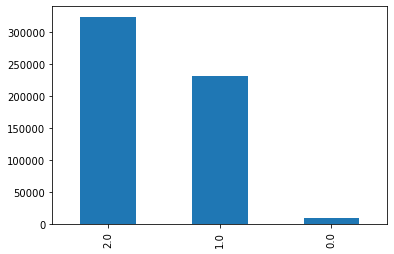

In [6]:
df["sentimentPolarity"].value_counts().plot(kind="bar")

In [7]:
df[["sentimentOverall","sentimentPolarity"]]

,sentimentOverall,sentimentPolarity
0,2,2.0
1,2,2.0
2,2,1.0
3,2,1.0
4,2,1.0
...,...,...
562706,2,2.0
562707,2,2.0
562708,1,2.0
562709,2,2.0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [9]:
df.overall=df.overall.astype("category")

In [10]:
x,y=df['reviewText'],df['sentimentOverall']

In [11]:
x.shape,y.shape

((562711,), (562711,))

In [12]:
x

0         the interface is super fast between the bignam...
1         great looking and performing cables  grips the...
2         havent had any issues with this product use it...
3         short review i bought  of these along with a c...
4         update belowi moved from a highend android pho...
                                ...                        
562706    update on december  im still delighted with th...
562707    amazing lens well worth the money i am a low b...
562708    i love my mini ipad because it is so small and...
562709    this camera is probably one of the best on the...
562710    this is my first seagate product and i swear o...
Name: reviewText, Length: 562711, dtype: object

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [14]:
vect=CountVectorizer()
x_train_new=vect.fit_transform(x_train,y_train)
x_test_new=vect.transform(x_test)

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [16]:
mb=MultinomialNB()
model=mb.fit(x_train_new,y_train)
guess=mb.predict(x_test_new)

In [17]:
accuracy_score(y_test,guess)

0.8361790756194999

In [18]:
df

,reviewText,overall,sentimentOverall,tokenized,polarity,subjectivity,sentimentPolarity
0,the interface is super fast between the bignam...,5,2,"['the', 'interface', 'is', 'super', 'fast', 'b...",0.083333,0.591667,2.0
1,great looking and performing cables grips the...,5,2,"['great', 'looking', 'and', 'performing', 'cab...",0.175000,0.562500,2.0
2,havent had any issues with this product use it...,5,2,"['havent', 'had', 'any', 'issues', 'with', 'th...",0.077778,0.477778,1.0
3,short review i bought of these along with a c...,5,2,"['short', 'review', 'i', 'bought', 'of', 'thes...",0.071429,0.414286,1.0
4,update belowi moved from a highend android pho...,5,2,"['update', 'belowi', 'moved', 'from', 'a', 'hi...",0.160714,0.496369,1.0
...,...,...,...,...,...,...,...
562706,update on december im still delighted with th...,5,2,"['update', 'on', 'december', 'im', 'still', 'd...",0.248833,0.555333,2.0
562707,amazing lens well worth the money i am a low b...,5,2,"['amazing', 'lens', 'well', 'worth', 'the', 'm...",0.457851,0.510009,2.0
562708,i love my mini ipad because it is so small and...,1,1,"['i', 'love', 'my', 'mini', 'ipad', 'because',...",0.020000,0.527333,2.0
562709,this camera is probably one of the best on the...,4,2,"['this', 'camera', 'is', 'probably', 'one', 'o...",0.312037,0.715741,2.0


In [19]:
from wordcloud import WordCloud

In [20]:
import matplotlib.pyplot as plt

def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("amazon.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [21]:
possitive_sentiment_overall=df[df["sentimentOverall"]==2]["reviewText"]
negative_sentiment_overall=df[df["sentimentOverall"]==1]["reviewText"]
neutral_sentiment_overall=df[df["sentimentOverall"]==0]["reviewText"]

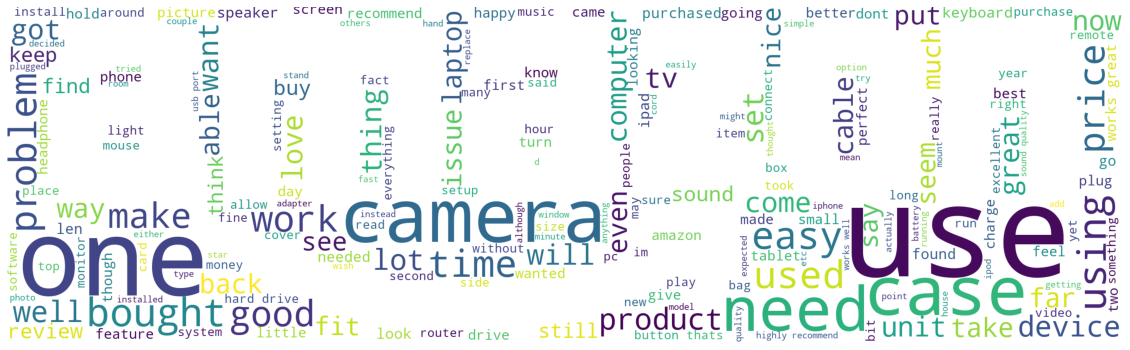

In [22]:
wc(possitive_sentiment_overall,"white")

In [23]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("amazon.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [24]:
possitive_sentiment_polarity=df[df["sentimentPolarity"]==2]["reviewText"]
negative_sentiment_polarity=df[df["sentimentPolarity"]==1]["reviewText"]
neutral_sentiment_polarity=df[df["sentimentPolarity"]==0]["reviewText"]

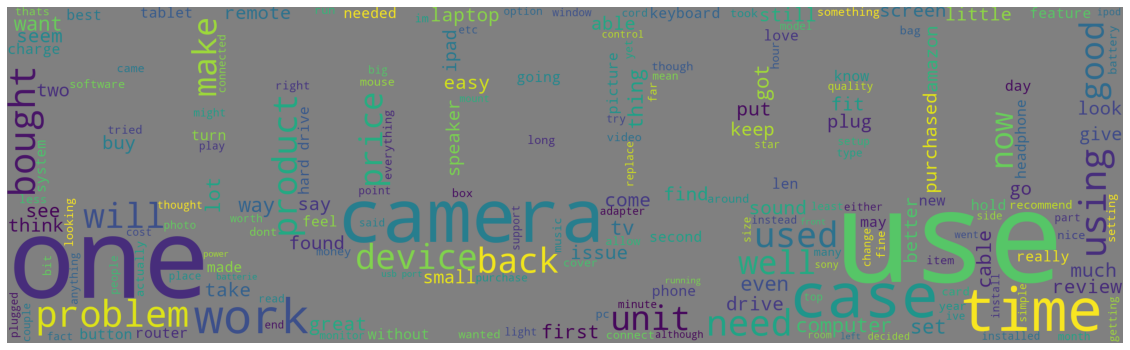

In [25]:
wc(negative_sentiment_polarity,"gray")

## Named Entity Recognition with NLTK and SpaCy

In [26]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [27]:
ex = df.reviewText[0]

In [28]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [29]:
sent = preprocess(ex)
sent

[('the', 'DT'),
 ('interface', 'NN'),
 ('is', 'VBZ'),
 ('super', 'JJ'),
 ('fast', 'RB'),
 ('between', 'IN'),
 ('the', 'DT'),
 ('bigname', 'NN'),
 ('streaming', 'VBG'),
 ('channels', 'NNS'),
 ('like', 'IN'),
 ('netflix', 'NN'),
 ('hulu', 'NN'),
 ('and', 'CC'),
 ('amazon', 'JJ'),
 ('prime', 'JJ'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('plex', 'NN'),
 ('channel', 'NN'),
 ('which', 'WDT'),
 ('lets', 'VBZ'),
 ('me', 'PRP'),
 ('stream', 'NN'),
 ('from', 'IN'),
 ('a', 'DT'),
 ('media', 'NNS'),
 ('server', 'NN'),
 ('in', 'IN'),
 ('another', 'DT'),
 ('room', 'NN'),
 ('this', 'DT'),
 ('box', 'NN'),
 ('is', 'VBZ'),
 ('now', 'RB'),
 ('the', 'DT'),
 ('only', 'JJ'),
 ('one', 'NN'),
 ('i', 'NN'),
 ('have', 'VBP'),
 ('hooked', 'VBN'),
 ('up', 'RP'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('tv', 'NN'),
 ('i', 'NN'),
 ('ripped', 'VBD'),
 ('out', 'RP'),
 ('my', 'PRP$'),
 ('tivo', 'NN'),
 ('and', 'CC'),
 ('bluray', 'NN'),
 ('player', 'NN'),
 ('after', 'IN'),
 ('using', 'VBG'),
 ('the', 'DT'),
 ('roku', 'NN'),
 ('for

In [30]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [31]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  (NP the/DT interface/NN)
  is/VBZ
  super/JJ
  fast/RB
  between/IN
  (NP the/DT bigname/NN)
  streaming/VBG
  channels/NNS
  like/IN
  (NP netflix/NN)
  (NP hulu/NN)
  and/CC
  amazon/JJ
  prime/JJ
  and/CC
  (NP the/DT plex/NN)
  (NP channel/NN)
  which/WDT
  lets/VBZ
  me/PRP
  (NP stream/NN)
  from/IN
  a/DT
  media/NNS
  (NP server/NN)
  in/IN
  (NP another/DT room/NN)
  (NP this/DT box/NN)
  is/VBZ
  now/RB
  (NP the/DT only/JJ one/NN)
  (NP i/NN)
  have/VBP
  hooked/VBN
  up/RP
  to/TO
  (NP the/DT tv/NN)
  (NP i/NN)
  ripped/VBD
  out/RP
  my/PRP$
  (NP tivo/NN)
  and/CC
  (NP bluray/NN)
  (NP player/NN)
  after/IN
  using/VBG
  (NP the/DT roku/NN)
  for/IN
  a/DT
  few/JJ
  days/NNS)


In [32]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
print(iob_tagged)

[('the', 'DT', 'B-NP'), ('interface', 'NN', 'I-NP'), ('is', 'VBZ', 'O'), ('super', 'JJ', 'O'), ('fast', 'RB', 'O'), ('between', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('bigname', 'NN', 'I-NP'), ('streaming', 'VBG', 'O'), ('channels', 'NNS', 'O'), ('like', 'IN', 'O'), ('netflix', 'NN', 'B-NP'), ('hulu', 'NN', 'B-NP'), ('and', 'CC', 'O'), ('amazon', 'JJ', 'O'), ('prime', 'JJ', 'O'), ('and', 'CC', 'O'), ('the', 'DT', 'B-NP'), ('plex', 'NN', 'I-NP'), ('channel', 'NN', 'B-NP'), ('which', 'WDT', 'O'), ('lets', 'VBZ', 'O'), ('me', 'PRP', 'O'), ('stream', 'NN', 'B-NP'), ('from', 'IN', 'O'), ('a', 'DT', 'O'), ('media', 'NNS', 'O'), ('server', 'NN', 'B-NP'), ('in', 'IN', 'O'), ('another', 'DT', 'B-NP'), ('room', 'NN', 'I-NP'), ('this', 'DT', 'B-NP'), ('box', 'NN', 'I-NP'), ('is', 'VBZ', 'O'), ('now', 'RB', 'O'), ('the', 'DT', 'B-NP'), ('only', 'JJ', 'I-NP'), ('one', 'NN', 'I-NP'), ('i', 'NN', 'B-NP'), ('have', 'VBP', 'O'), ('hooked', 'VBN', 'O'), ('up', 'RP', 'O'), ('to', 'TO', 'O'), ('the', 'DT', '

In [33]:
#pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install -U spacy

In [ ]:
#python -m spacy download en_core_web_sm

In [45]:
pip install en_core_web_sm

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 10.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [50]:
import spacy
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_sm")

OSError: [E053] Could not read config file from /Users/chadsaglam/opt/anaconda3/lib/python3.9/site-packages/en_core_web_sm/en_core_web_sm-2.2.0/config.cfg

In [51]:
doc = nlp(ex)
print([(X.text, X.label_) for X in doc.ents])

NameError: name 'nlp' is not defined

In [52]:
print([(X, X.ent_iob_, X.ent_type_) for X in doc])

NameError: name 'doc' is not defined

In [ ]:
labels = [x.label_ for x in article.ents]
Counter(labels)

In [ ]:
displacy.render(nlp(str(sentences[20])), jupyter=True, style='ent')